<a href="https://www.kaggle.com/code/vedatgul/imagenet-resnet50-object-recognition?scriptVersionId=158281882" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# IMAGENET-ResNet50-Object Recognition

Project Description:
In this project, we developed a model capable of recognizing various objects in the ImageNet dataset using the ResNet50 architecture. ResNet50 has a well-known success among deep learning models and offers a wide range of applications. My project aims to explore current technological developments in the field of object recognition.

Technologies Used:
Popular deep learning libraries such as TensorFlow and Keras were used in the project. ResNet50 architecture increased the success of the project with the depth of the model and effective learning capabilities. The ImageNet dataset was used for training, improving the overall object recognition capabilities of the model.

Application Areas:
Such object recognition models can be used in many fields such as autonomous vehicles, security systems, healthcare and retail. Object recognition technology can improve efficiency and enable automation in many industries.

In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests


In [3]:
model = ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 4s 0us/step


In [4]:
# Defining a resizing function to bring the image to a format suitable for input

def prepare_image(image, target):
    image = image.resize(target)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image)
    
    return image

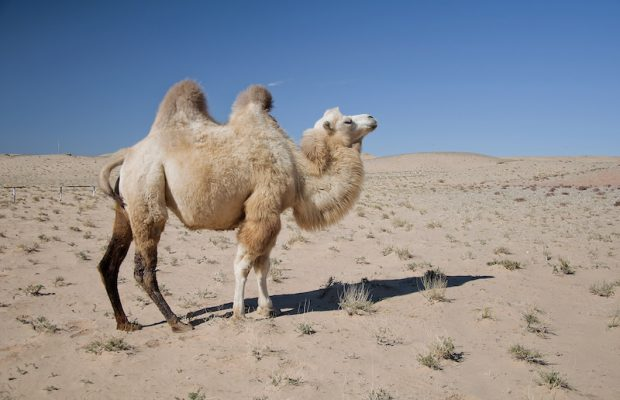

In [5]:
from PIL import Image
from io import BytesIO
import requests
from IPython.display import display

ImageURL = 'https://arkeofili.com/wp-content/uploads/2022/03/devas1-620x400.jpg'
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
display(image)


In [6]:
# Classification with trained model

data = {"success": False}

# Resize to 224 x 224
pre_image = prepare_image(image, target=(224, 224)) 

# Apply preprocessed image to prediction model
preds = model.predict(pre_image)

# Estimate
results = imagenet_utils.decode_predictions(preds)
data["predictions"] = []

for (imagenetID, label, prob) in results[0]:
    r = {"label": label, "probability": float(prob)}
    data["predictions"].append(r)

data["success"] = True

print(data)

35363/35363 [==============================] - 0s 0us/step
{'success': True, 'predictions': [{'label': 'Arabian_camel', 'probability': 0.9919884204864502}, {'label': 'bighorn', 'probability': 0.002911946503445506}, {'label': 'ibex', 'probability': 0.0017883321270346642}, {'label': 'llama', 'probability': 0.0014633391983807087}, {'label': 'whippet', 'probability': 0.00022749431082047522}]}


In [7]:
print("The highest classification estimate is {1} with a ratio of {0}".format(data["predictions"][0]["probability"],data["predictions"][0]["label"]))

The highest classification estimate is Arabian_camel with a ratio of 0.9919884204864502
